# Build a Circuit to Emulate the Scope's Filter

Main reference: [Passive Low Pass Filter](https://www.electronics-tutorials.ws/filter/filter_2.html)

## Relavant Equiations

### RC Potential Divider Equation
$$ V_{out}=V_{in}\frac{X_C}{Z} \; (V)$$
where
\begin{align}
    X_C & = \frac{1}{2\pi fC} \; (\Omega)\\
    Z & = \sqrt{R^2+X_C^2} \; (\Omega)
\end{align}

Voltage gain can be written as
\begin{align}
    \frac{V_{out}}{V_{in}} &= \frac{1}{\sqrt{1+\left(\frac{R}{X_C}\right)^2}} \\
    &= \frac{1}{\sqrt{1+ \left( 2\pi fRC \right)^2 }}
\label{eq:voltage_gain} \tag{1}
\end{align}

### Power Gain Level

The [power gain level](https://en.wikipedia.org/wiki/Decibel#Root-power_(field)_quantities) is defined as
\begin{align}
    L_G &= 10\log\left( \frac{V_{out}}{V_{in}}\right)^2 \\
    &= 20\log\left( \frac{V_{out}}{V_{in}}\right) \; \textrm{(dB)}
\label{eq:power_gain_level} \tag{2}
\end{align}

We can make the famous [**Bode plot**](https://en.wikipedia.org/wiki/Bode_plot) with $RC=1$. (maybe not now...)

### Cutoff Frequency
The cutoff frequency is defined as the frequency at which the power gain drops to $50\%$. In decibel unit, this value is $-3$ dB, known as the [$3$ dB point](https://en.wikipedia.org/wiki/Cutoff_frequency#Electronics).

<span style="color:red">Here is an ambiguity. In literature about Butterworth filter, frequency actually means **angular frequency**. However, by glancing through the scope's manual, I cannot figure out whether the frequency is the **usual frequency** or the **angular frequency**.</span>

<span style="color:blue">For now, I will assume the frequency used by the scope is also **angular frequency**.</span>

## The RC Values Leading to a 20 MHz Cutoff

With a power gain $\alpha$, we have
\begin{equation}
    \left( \frac{V_{out}}{V_{in}} \right)^2=\alpha
\label{eq:cutoff_power} \tag{3}
\end{equation}

Substitute eq.$~\eqref{eq:voltage_gain}$ into eq.$~\eqref{eq:cutoff_power}$ and rearrange, we have
\begin{equation}
    RC=\frac{1}{\omega}\sqrt{\frac{1}{\alpha}-1} \;\; (\omega=2\pi f)
\end{equation}

With $\alpha=0.5$, $\omega =20$ MHz, we obtain
\begin{equation}
    \boxed{RC=5\times 10^{-8}}
\end{equation}

In [16]:
from math import *
RC=1/20e6*sqrt(1/.5-1)
print(RC)

5e-08


## Scope Measurement

I inject sine waves with fixed frequency from the pulse generator. The pulse generator shows that the frequency it means is **normal frequency**.

The pulse amplitude I set up on the function generator is 1.65 V. However, I am measuring peak-to-peak voltage with the scope, which is enlarged by noise.

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.optimize
x = [0.01e6, 0.1e6, 1e6, 5e6, 10e6, 15e6, 20e6, 25e6, 30e6, 35e6, 40e6, 45e6, 50e6, 60e6, 70e6, 80e6, 100e6]
y = [1.88, 1.88, 1.88, 1.82, 1.72, 1.56, 1.32, 1.08, 0.84, 0.6, 0.4, 0.32, 0.266, 0.207, 0.184, 0.173, 0.162]

2.4002636980817265 -8.20024105117824e-09 -0.479083012462608


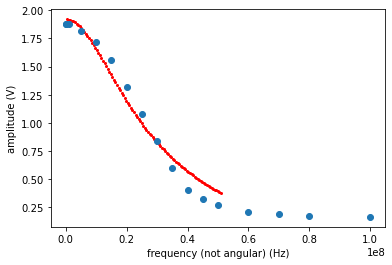

In [9]:
def divider_eq(x, vin, RC, voffset):
    return vin/np.sqrt(1+(2*math.pi*x*RC)**2) + voffset
# initial parameters
p_init = [1.88, 5e-8, 0.162]
fit_par, fit_err = scipy.optimize.curve_fit(divider_eq, x, y, p_init)
print(fit_par[0], fit_par[1], fit_par[2])

x_fit = np.linspace(.5e6, 51e6, 100)
y_fit = divider_eq(x_fit, fit_par[0], fit_par[1], fit_par[2])
plot_fit = plt.scatter(x=x_fit, y=y_fit, c='r', s=4)

plot_raw_meas = plt.scatter(x=x, y=y)
cache = plt.xlabel('frequency (not angular) (Hz)')
cache = plt.ylabel('amplitude (V)')

In [26]:
vout = 1.32-0.162
vin = 1.88-0.162
p_gain = (vout/vin)**2
print('power gain: {:.2f}'.format(p_gain))
print('RC: {:.2e}'.format(1/2/math.pi/20e6*sqrt(1/p_gain-1)))
print('2πRC: {:.2e}'.format(1/20e6*sqrt(1/p_gain-1)))

power gain: 0.45
RC: 8.72e-09
2πRC: 5.48e-08
